In [1]:
import os

os.sys.path.append(os.path.join(os.getcwd(), "../../.."))
from charts.cohen import plot_cohen_kappa
from models.LLMOutput import ConfidenceType
from utils.helpers import print_prompts
from metrics.run import gather_data_for_run_ids
from charts.calibration import plot_confidence_calibration_curve
from metrics.agreement.krippendorff import compute_krippendorff_alpha
from charts.performance import (
    plot_precision,
    plot_recall,
    plot_f1_score,
    plot_support_counts,
    plot_precision_heatmap,
    plot_recall_heatmap,
    plot_f1_score_heatmap,
)
from metrics.results_analyzer import ResultsAnalyzer, visualize_results

# Analyzing results for experience #8

In [2]:
RUN_IDS = [
    "670ee2f001c10201d4444a05", # "Postes et télécommunications"
    "670ee791b87ec15b80169b4b", # "Télécommunications"
    "670eecbe88e1c74e62bcc83c", # "Informatique"
    "670ef0f9d97955c9831ad2f4", # "Numérique"
]
OUTPUT_PATH = "images/experience_8/metrics"

RUN_INFOS = gather_data_for_run_ids(RUN_IDS)

The first three runs are based on a batch that contains 1250 PQs sampled from the dataset with labeled matching the following theme list :
- The first batch has 250 questions labeled as "collectivités locales" from the VIIIth and IXth parliamentary terms
- The second batch has 250 questions labeled as "collectivités territoriales" from the Xth to XVth parliamentary terms
Here is the themes distribution for the batch used in the experiment :


In [ ]:
plot_support_counts(RUN_IDS, save_folder=OUTPUT_PATH)

Using this batch, we tried 3 different prompting strategy (all of them in french) :

- zero-shot
- zero-shot verbalized confidence
- zero-shot self-calibration

We only used one temperature setup for this run :
- 0.0

The following is the analysis for each prompting strategy used for experience #7. In that experiment, we mainly focus on how "collectivités locales" vs. "collectivités territoriales" are labeled properly and which confidence levels are registered on that task.

Our hypothesis is that contemporary categories ("collectivités territoriales") should have higher performance score than native ones ("collectivités locales").


## Zero-shot Vanilla ("Postes et télécommunications")

In [4]:
print_prompts(RUN_INFOS[0]["prompts"])

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
- postes et télécommunications
Ta réponse doit contenir une seule chose: le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.

user: {0}



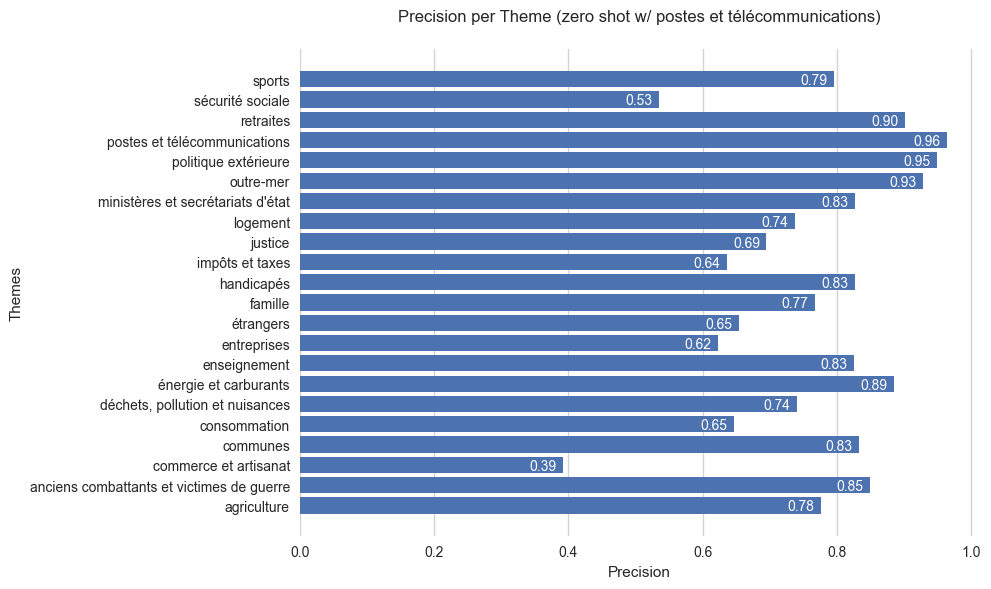

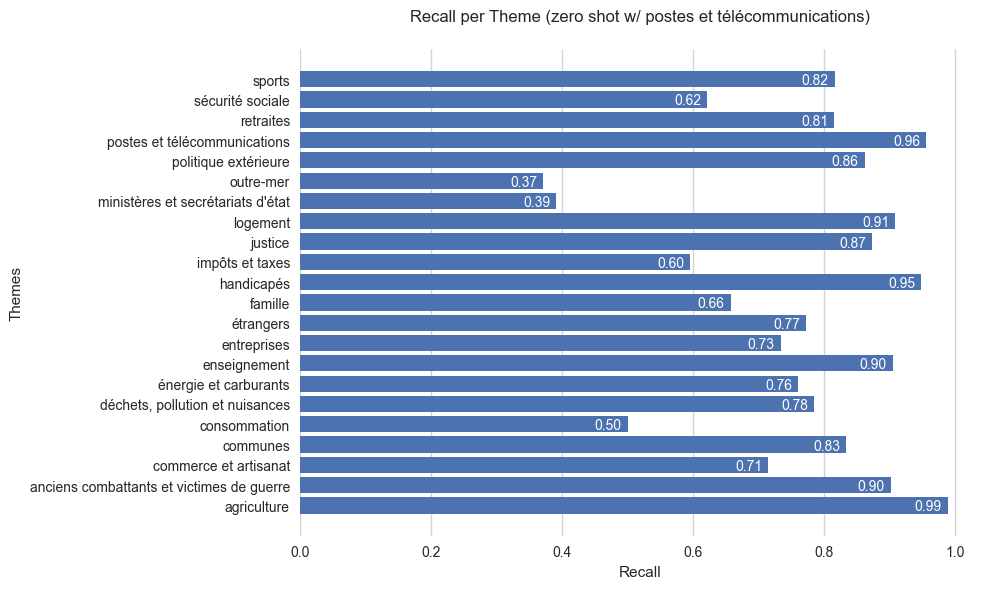

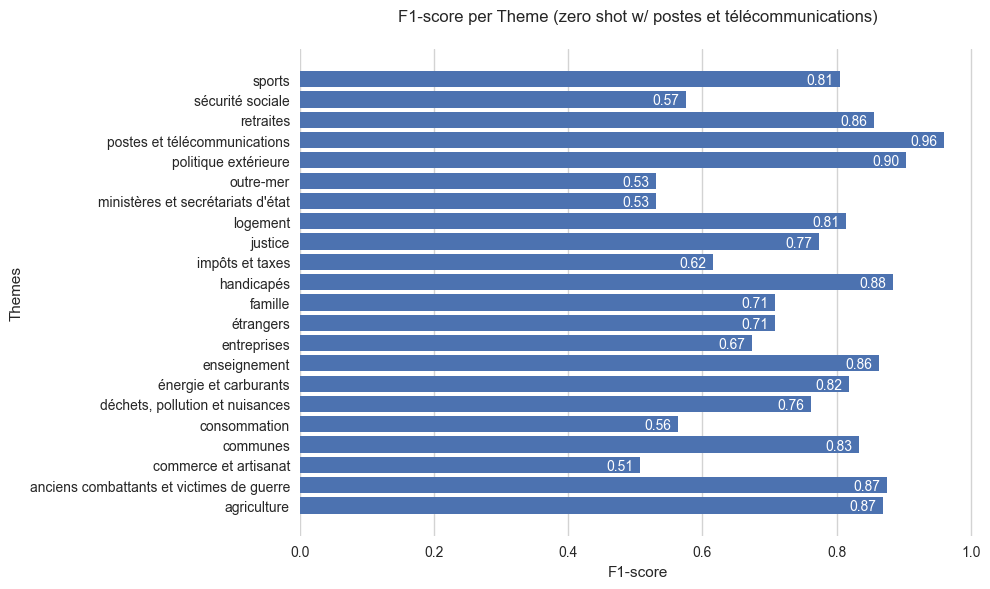

In [5]:
plot_precision(RUN_IDS[0], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[0], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[0], save_folder=OUTPUT_PATH)

(analysis)

## Zero-shot Vanilla ("Télécommunications")

(prompting strategy description)


In [6]:
print_prompts(RUN_INFOS[1]["prompts"])

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
- télécommunications
Ta réponse doit contenir une seule chose: le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.

user: {0}



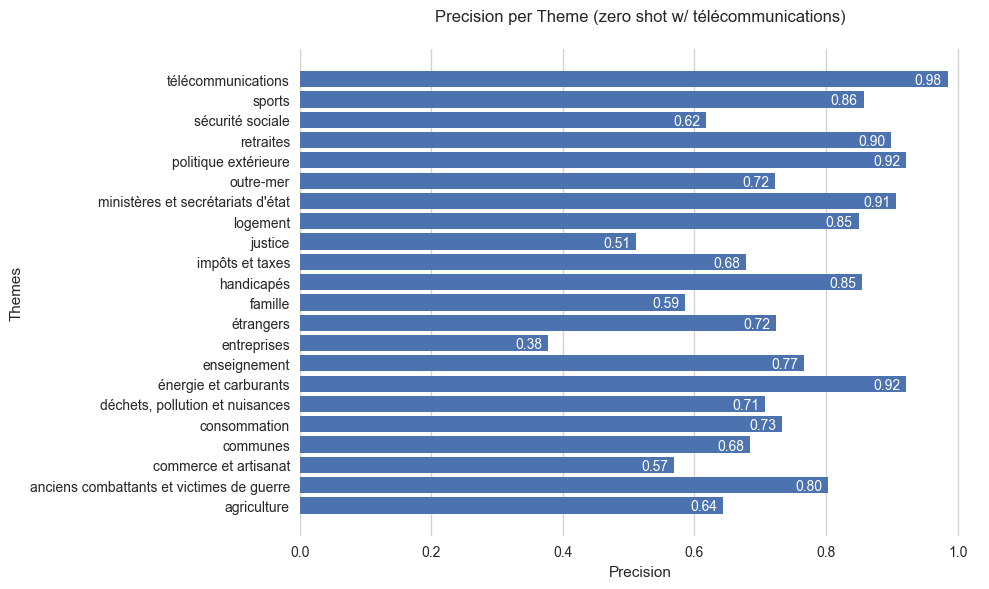

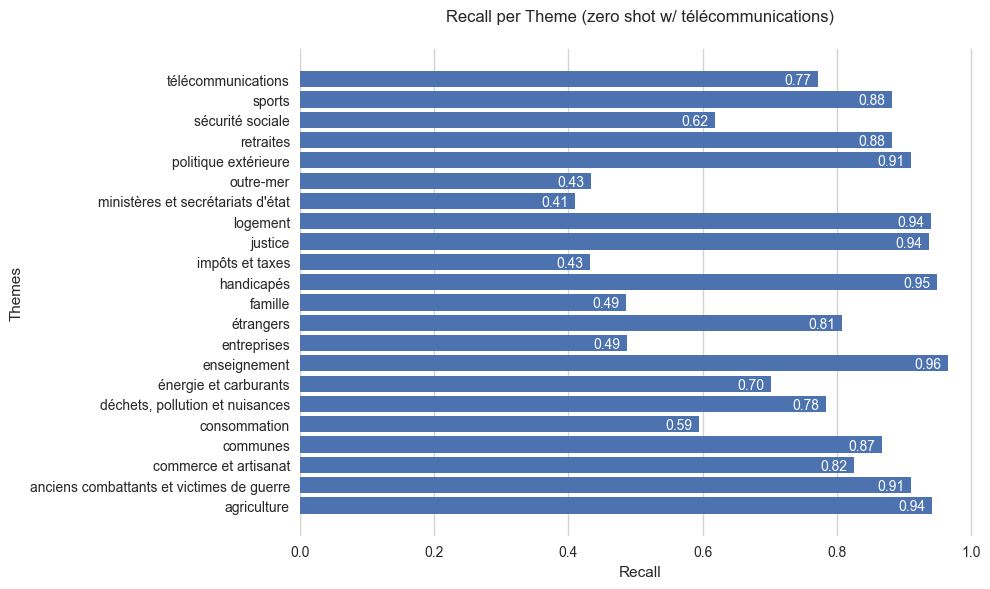

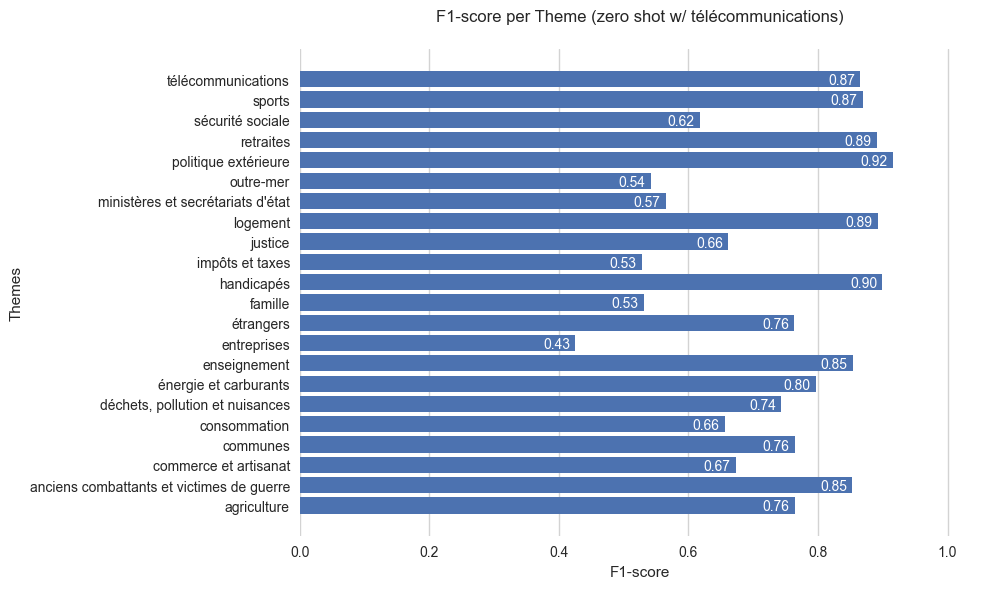

In [7]:
plot_precision(RUN_IDS[1], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[1], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[1], save_folder=OUTPUT_PATH)

(analysis)

## Zero-shot Vanilla ("Informatique")

(prompting strategy description)


In [8]:
print_prompts(RUN_INFOS[2]["prompts"])

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
- informatique
Ta réponse doit contenir une seule chose: le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.

user: {0}



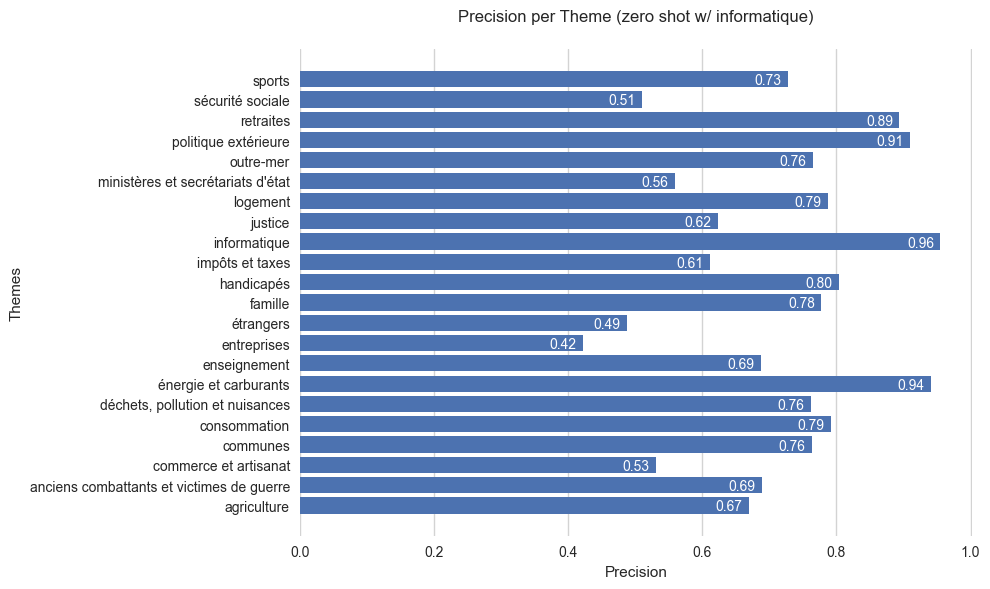

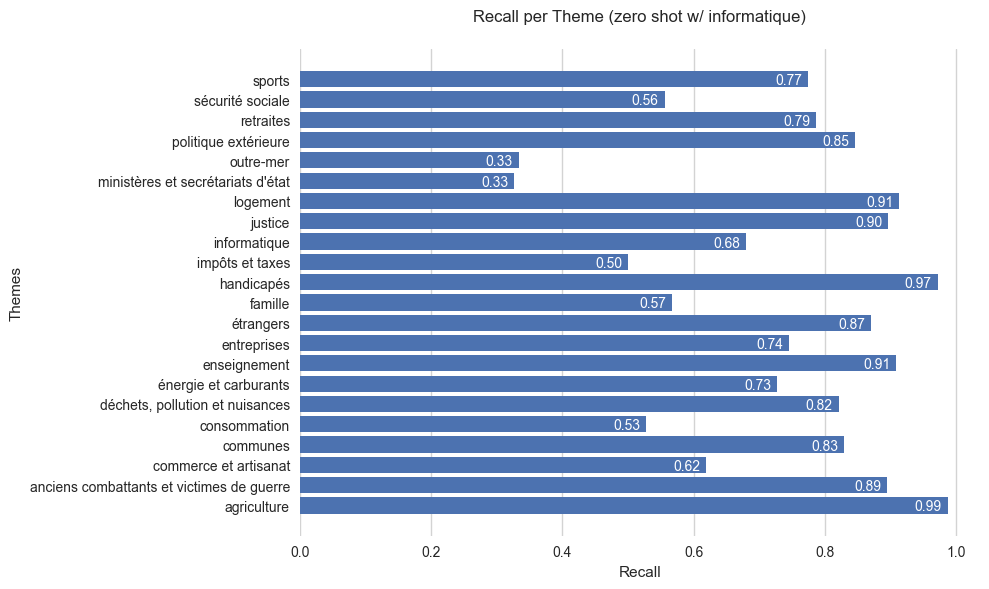

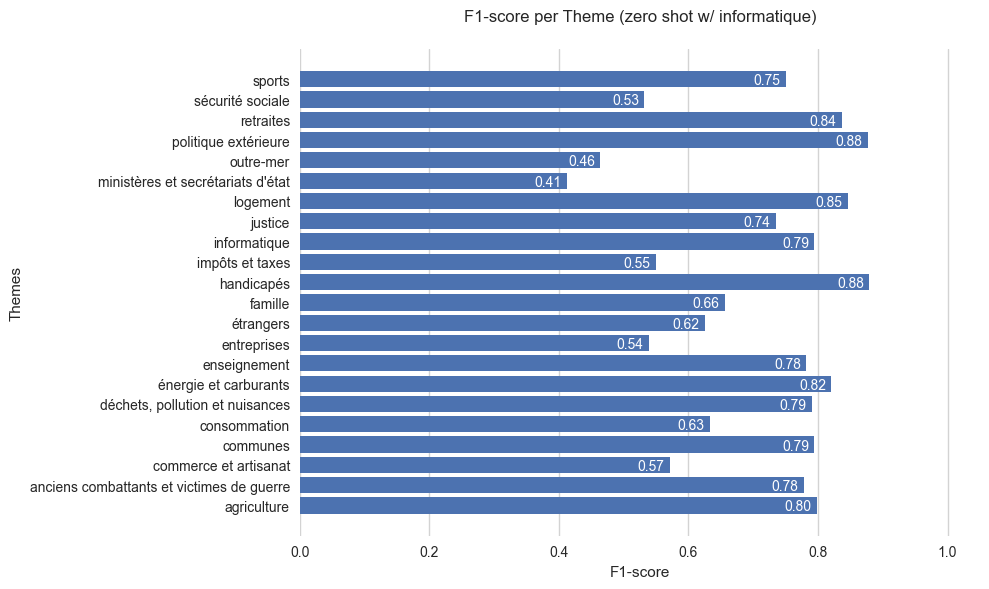

In [9]:
plot_precision(RUN_IDS[2], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[2], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[2], save_folder=OUTPUT_PATH)

(analysis)

## Zero-shot Vanilla ("Numérique")

(prompting strategy description)


In [10]:
print_prompts(RUN_INFOS[3]["prompts"])

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
- numérique
Ta réponse doit contenir une seule chose: le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.

user: {0}



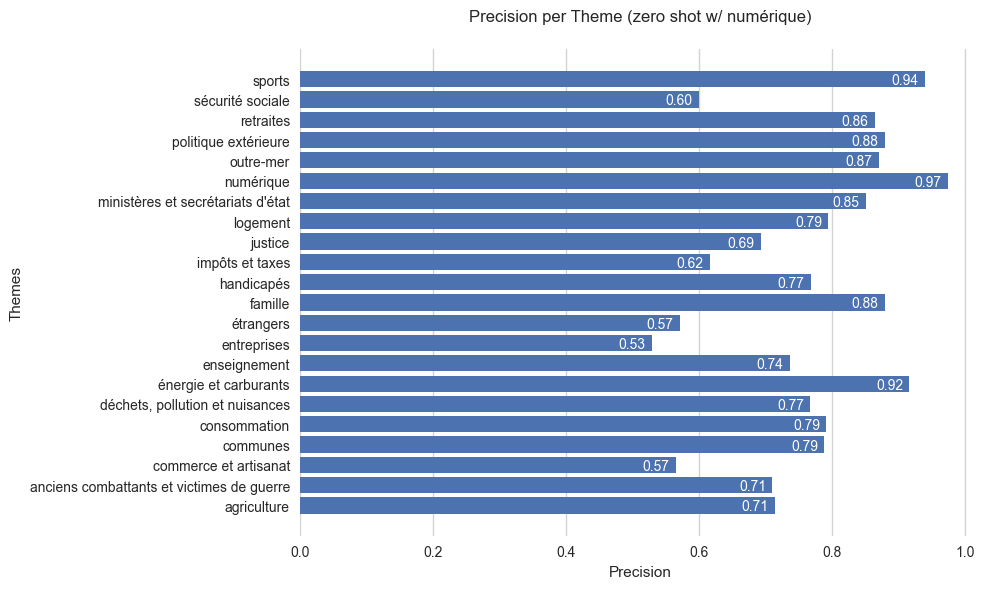

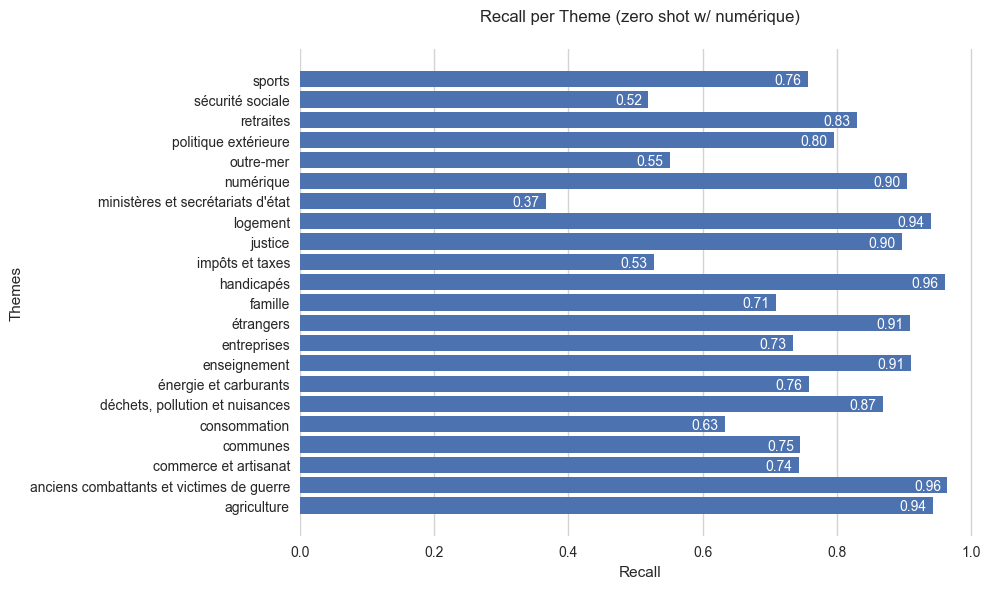

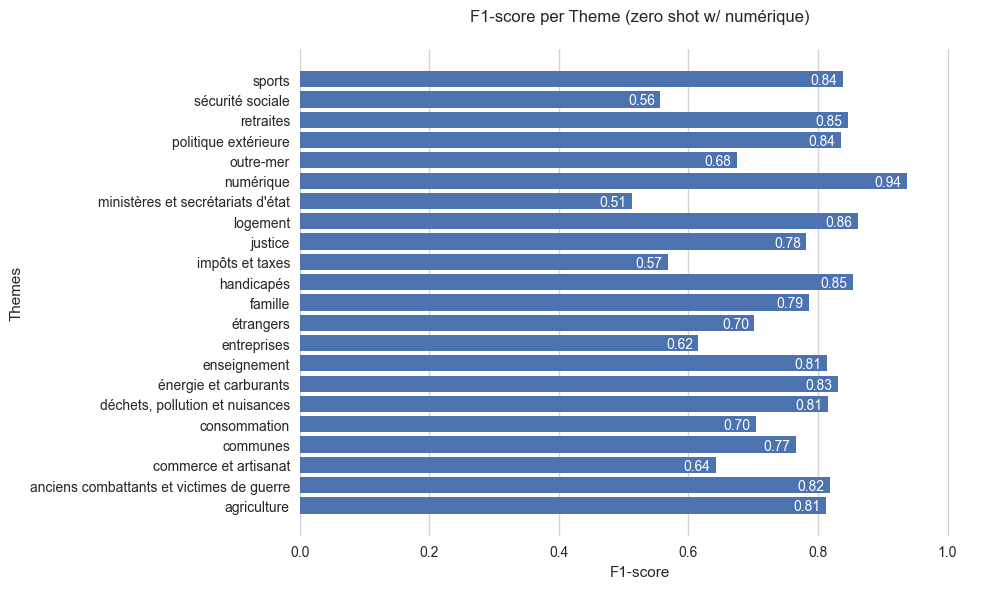

In [11]:
plot_precision(RUN_IDS[3], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[3], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[3], save_folder=OUTPUT_PATH)

(analysis)

## Confidence

(description)


100%|█████████████████████████████████████████████████████████████████████████████| 1493/1493 [00:00<00:00, 3199.56it/s]


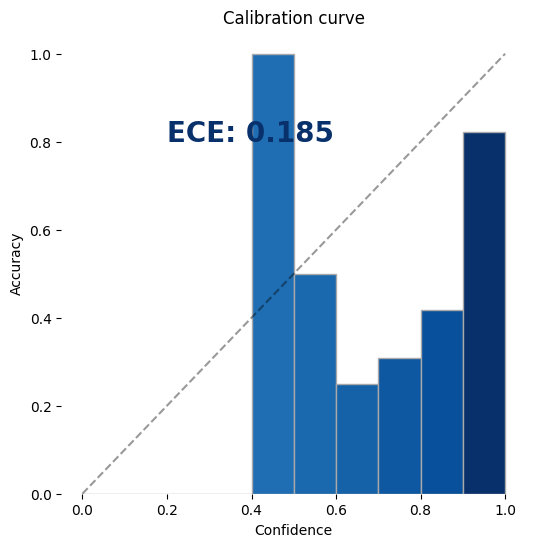

In [12]:
plot_confidence_calibration_curve(RUN_IDS[0], ConfidenceType.Logprobs)

100%|█████████████████████████████████████████████████████████████████████████████| 1494/1494 [00:00<00:00, 2700.12it/s]


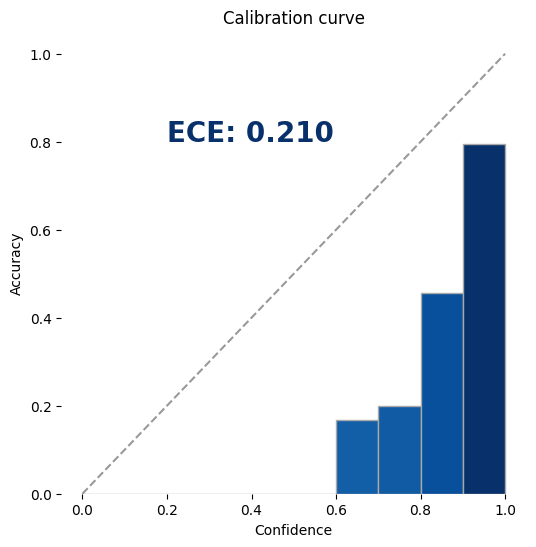

In [13]:
plot_confidence_calibration_curve(RUN_IDS[1], ConfidenceType.Logprobs)

100%|█████████████████████████████████████████████████████████████████████████████| 1497/1497 [00:00<00:00, 7007.28it/s]


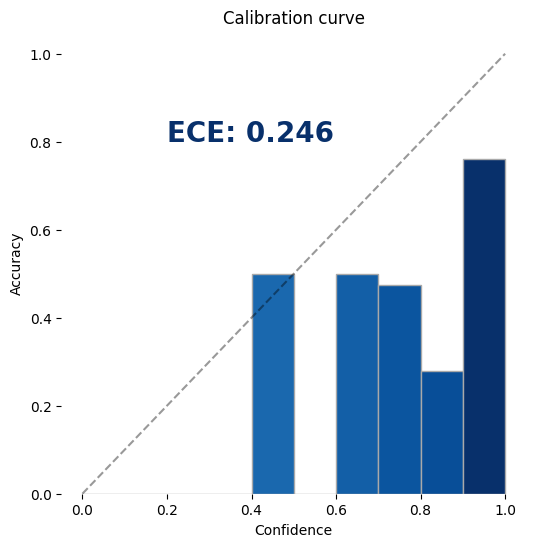

In [14]:
plot_confidence_calibration_curve(RUN_IDS[2], ConfidenceType.Logprobs)

100%|█████████████████████████████████████████████████████████████████████████████| 1493/1493 [00:00<00:00, 6489.10it/s]


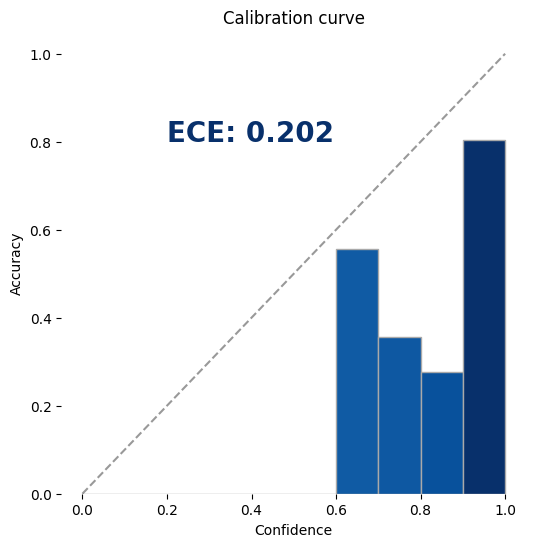

In [15]:
plot_confidence_calibration_curve(RUN_IDS[3], ConfidenceType.Logprobs)

## Qualitative analysis

### Postes et télécommunications

In [11]:
ra = ResultsAnalyzer(RUN_IDS[0])

Retrieving all question results...


100%|█████████████████████████████████████████████████████████████████████████████| 1493/1493 [00:01<00:00, 1178.35it/s]


### Télécommunications

In [12]:
ra = ResultsAnalyzer(RUN_IDS[1])

Retrieving all question results...


100%|█████████████████████████████████████████████████████████████████████████████| 1494/1494 [00:01<00:00, 1213.84it/s]


### Informatique

In [13]:
ra = ResultsAnalyzer(RUN_IDS[2])

Retrieving all question results...


100%|█████████████████████████████████████████████████████████████████████████████| 1497/1497 [00:01<00:00, 1344.37it/s]


### Numérique

In [14]:
ra = ResultsAnalyzer(RUN_IDS[3])

Retrieving all question results...


100%|██████████████████████████████████████████████████████████████████████████████| 1493/1493 [00:02<00:00, 714.00it/s]


## Statistical tests

(description)


In [16]:
# plot_stats(RUN_IDS)